# Bifurcations in crowd dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from numpy.typing import ArrayLike

from sir_model import *
from config import *
from utils import plot_bifurcation, plot_phase

%load_ext autoreload
%autoreload 2

In [2]:
random_state = 12345
time = np.linspace(t_0, t_end, steps)

### Generate initial state and solve the IVP

In [3]:
# information
print("Reproduction number R0=", R0(beta, d, nu, mu1))
print('Globally asymptotically stable if beta <=d+nu+mu0. This is', beta <= d+nu+mu0)

# simulation
rng = np.random.default_rng(random_state) # initialise random number generator

# random initial state: List[S
SIM0 = rng.uniform(low=(190, 0, 1), high=(199,0.1,8), size=(3,))

sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='LSODA', rtol=rtol, atol=atol)

Reproduction number R0= 0.9956709956709958
Globally asymptotically stable if beta <=d+nu+mu0. This is False


### Plot Results

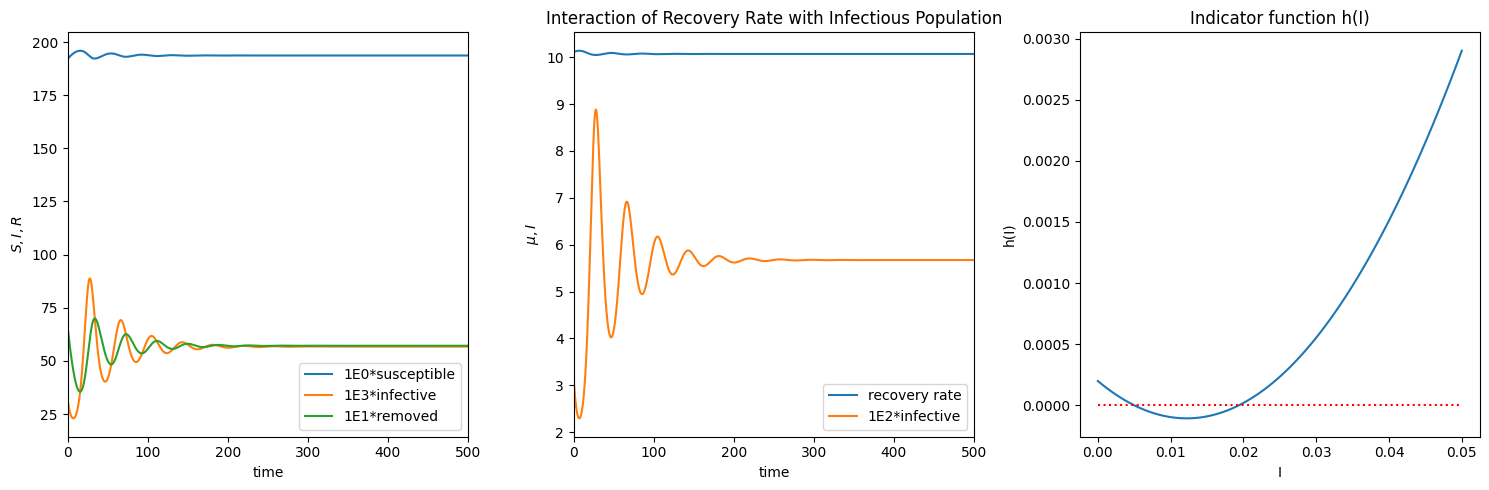

In [4]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(sol.t, sol.y[0]-0*sol.y[0][0], label='1E0*susceptible')
ax[0].plot(sol.t, 1e3*sol.y[1]-0*sol.y[1][0], label='1E3*infective')
ax[0].plot(sol.t, 1e1*sol.y[2]-0*sol.y[2][0], label='1E1*removed')
ax[0].set_xlim([0, 500])
ax[0].legend()
ax[0].set_xlabel("time")
ax[0].set_ylabel(r"$S,I,R$")

ax[1].plot(sol.t, mu(b, sol.y[1], mu0, mu1), label='recovery rate')
ax[1].plot(sol.t, 1e2*sol.y[1], label='1E2*infective')
ax[1].set_xlim([0, 500])
ax[1].legend();
ax[1].set_title("Interaction of Recovery Rate with Infectious Population")
ax[1].set_xlabel("time")
ax[1].set_ylabel(r"$\mu,I$")

I_h = np.linspace(-0.,0.05,100)
ax[2].plot(I_h, h(I_h, mu0, mu1, beta, A, d, nu, b))
ax[2].plot(I_h, 0*I_h, 'r:')
#ax[2].set_ylim([-0.1,0.05])
ax[2].set_title("Indicator function h(I)")
ax[2].set_xlabel("I")
ax[2].set_ylabel("h(I)")

fig.tight_layout()

### Explore Data plotting 3-dimensional SIR-trajectory

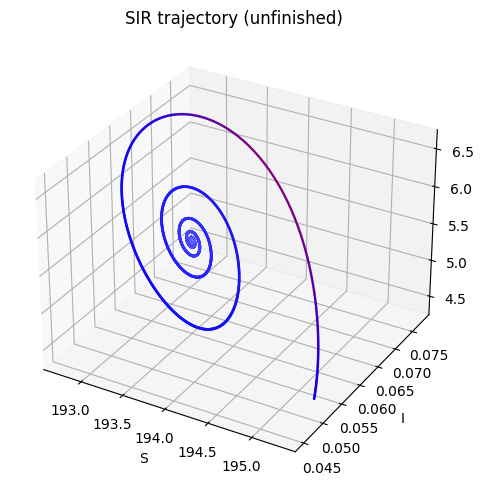

In [11]:
# %matplotlib qt
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection="3d")

cmap = ["BuPu", "Purples", "bwr"][1]

SIM0 = [195.3, 0.052, 4.4] # what happens with this initial condition when b=0.022? -- it progresses VERY slowly. Needs t_end to be super large.
sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
ax.plot(sol.y[0], sol.y[1], sol.y[2], 'r-');
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap='bwr');

# SIM0 = [195.7, 0.03, 3.92] # what happens with this initial condition when b=0.022?
# sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
# ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)
#
# SIM0 = [193, 0.08, 6.21] # what happens with this initial condition when b=0.022?
# sol = solve_ivp(model, t_span=[time[0],time[-1]], y0=SIM0, t_eval=time, args=(mu0, mu1, beta, A, d, nu, b), method='DOP853', rtol=rtol, atol=atol)
# ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=1, c=time, cmap=cmap)

ax.set_xlabel("S")
ax.set_ylabel("I")
ax.set_zlabel("R")

ax.set_title("SIR trajectory (unfinished)") 
fig.tight_layout()

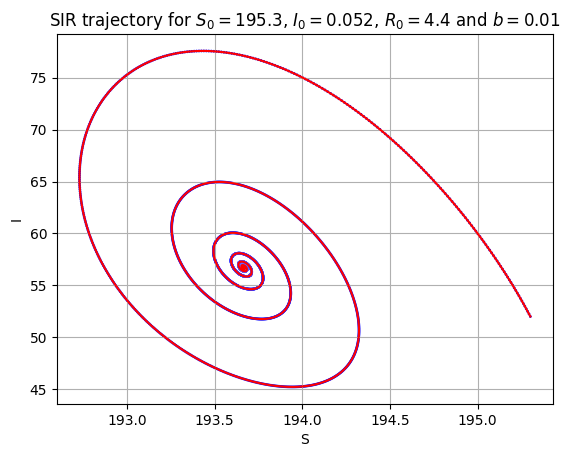

In [6]:
%matplotlib inline
plt.plot(sol.y[0], sol.y[1] * 1e3, 'r-')
plt.scatter(sol.y[0], sol.y[1] * 1e3, s=1, c=time, cmap='bwr')
plt.grid(True)
plt.xlabel("S")
plt.ylabel("I")
plt.title("SIR trajectory for $S_0=${}, $I_0=${}, $R_0=${} and $b=${}".format(SIM0[0], SIM0[1], SIM0[2], b))
plt.show()

### Variation of number of beds parameter
First we explore the parameter space

In [7]:
b_array = np.arange(0.01, 0.031, 0.001)
initial_states = [[195.3, 0.052, 4.4], [195.7, 0.03, 3.92], [193, 0.08, 6.21]]

# plot_bifurcation(b_array, initial_states)

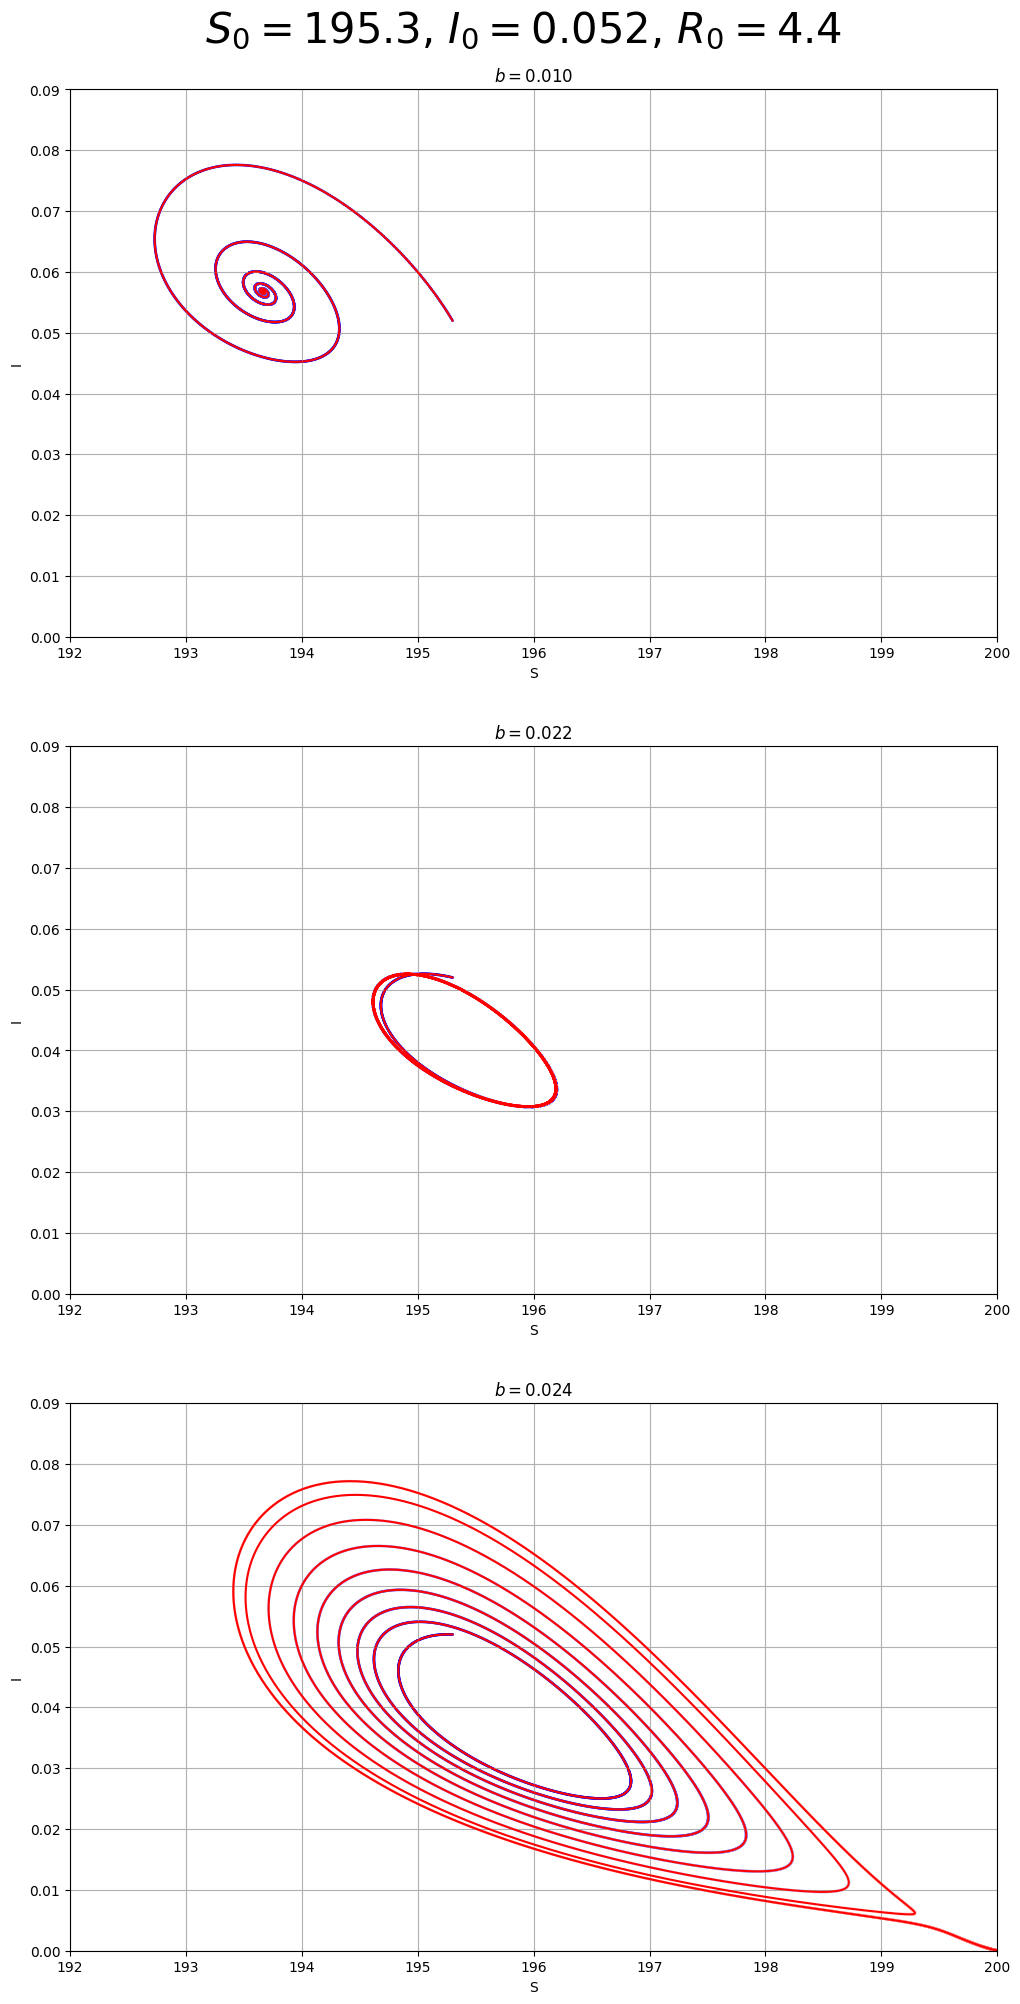

In [8]:
plot_bifurcation([0.01, 0.022, 0.024], [initial_states[0]], columns=1, save_fig=True, figheight=20, figwidth=10)

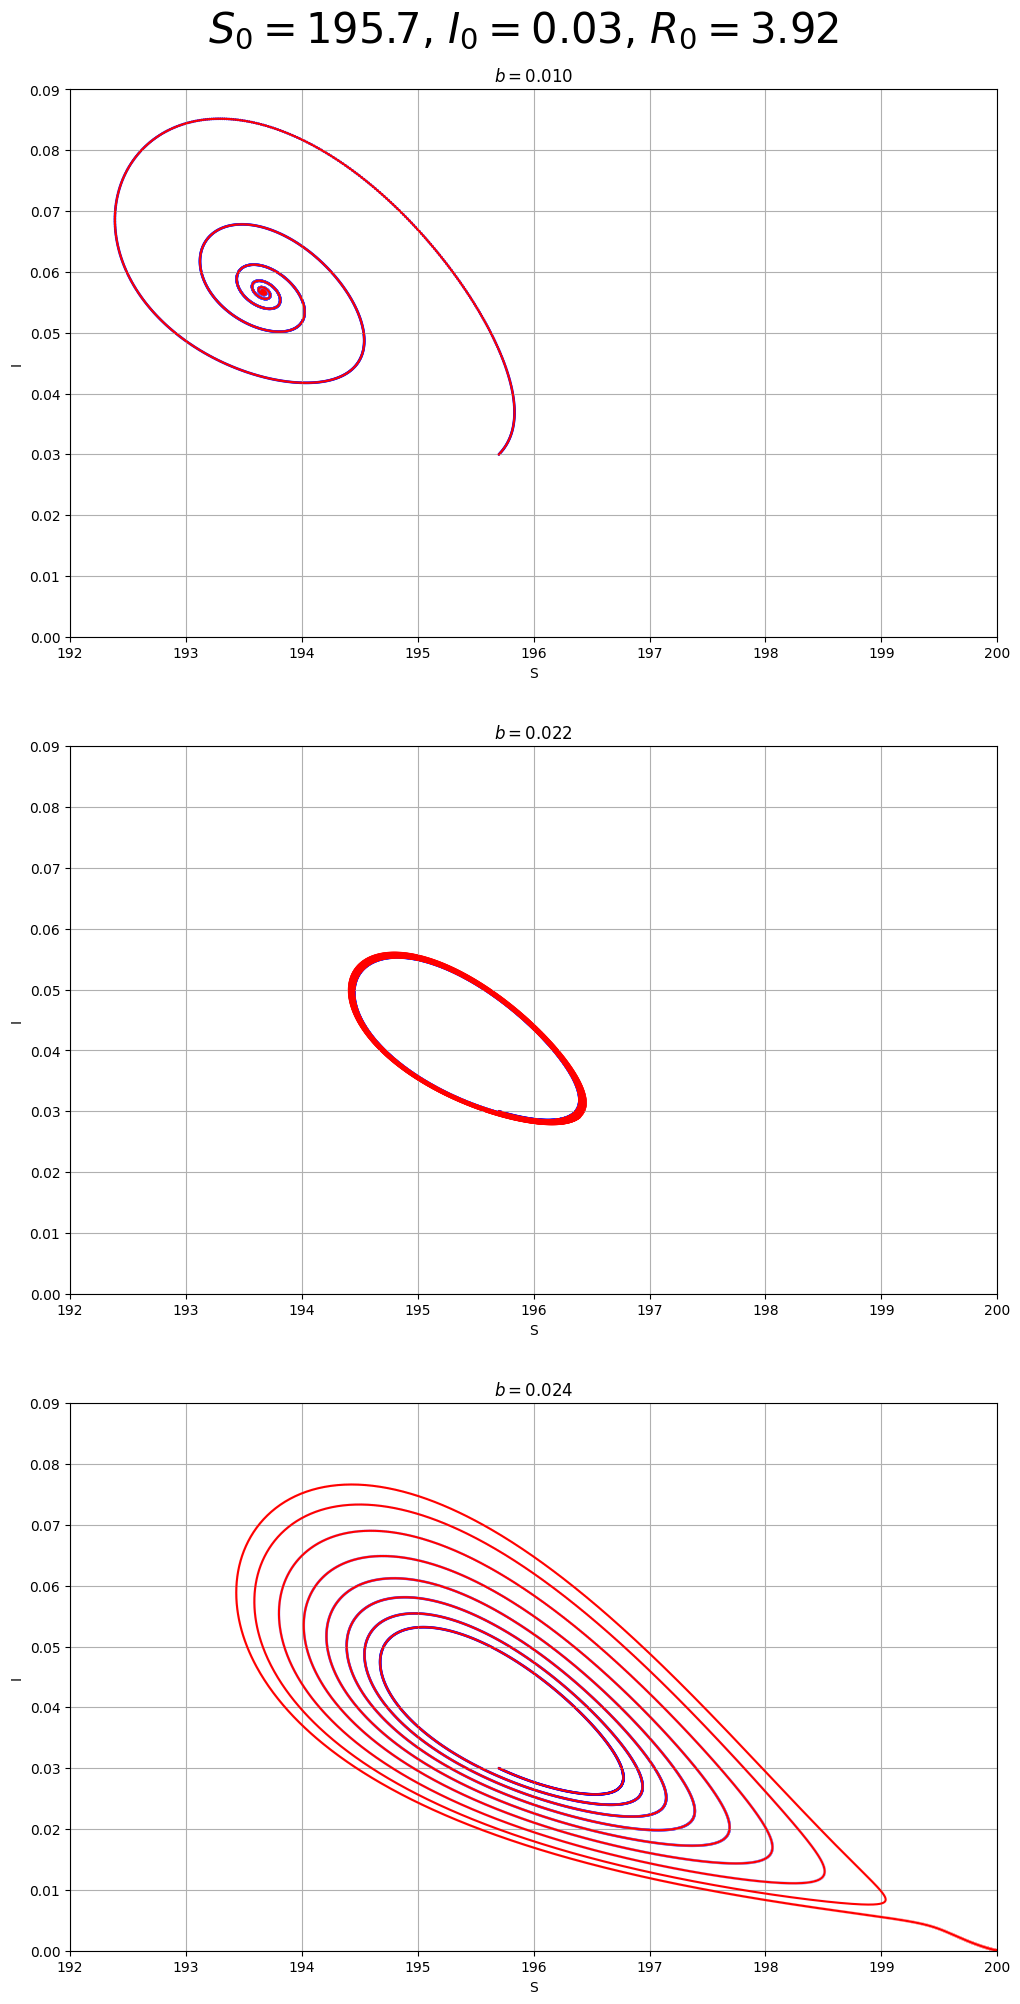

In [9]:
plot_bifurcation([0.01, 0.022, 0.024], [initial_states[1]], columns=1, save_fig=True, figheight=20, figwidth=10)

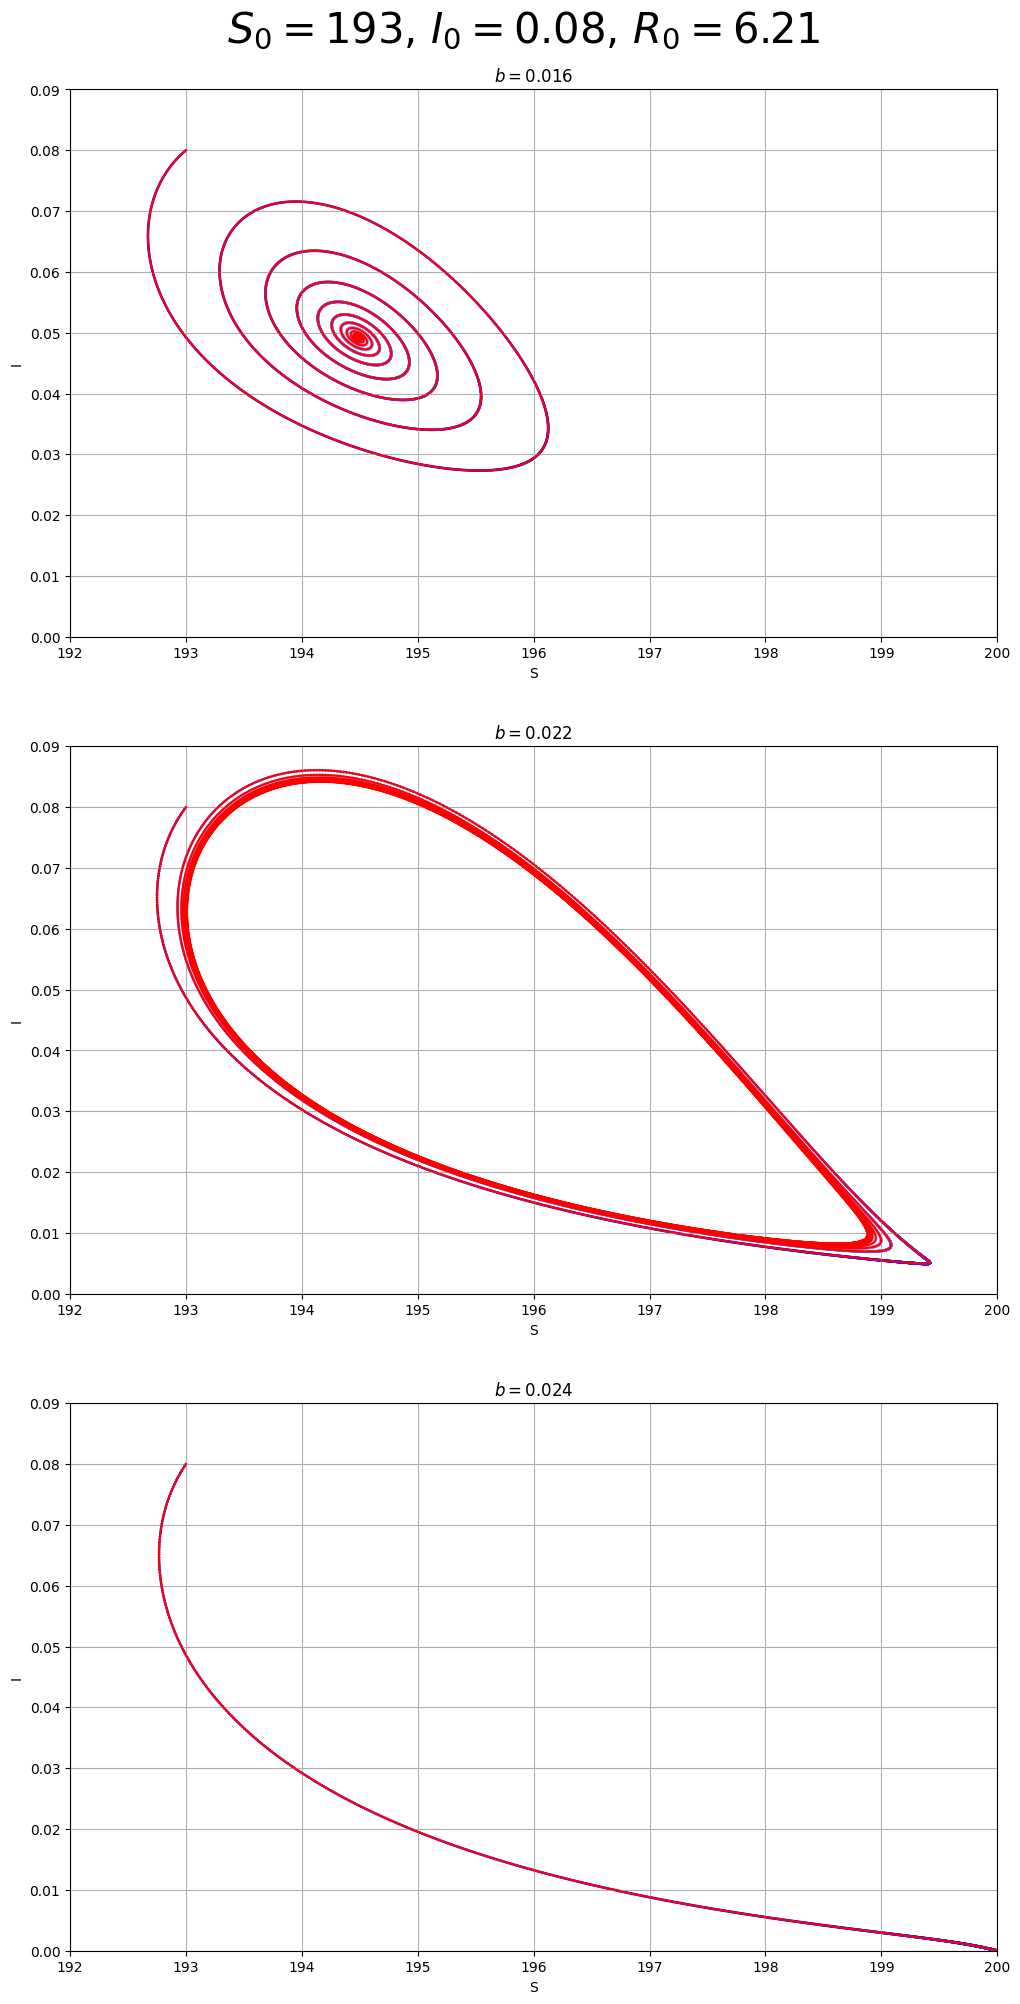

In [10]:
plot_bifurcation([0.016, 0.022, 0.024], [initial_states[2]], columns=1, save_fig=True, figheight=20, figwidth=10)

In [76]:
%matplotlib Qt
X,Y,Z,U,V,W = plot_phase(10, 10.45, 11, 20, 0.1, 1, 0.01)

In [71]:
X[5,0,0]

195.0